In [1]:
import chipwhisperer as cw
import matplotlib.pyplot as plt

In [2]:
# cw.program_sam_firmware(hardware_type='cwhusky')

In [3]:
scope = cw.scope()
# scope.upgrade_firmware()

In [4]:
target = cw.target(scope, cw.targets.SimpleSerial) #cw.targets.SimpleSerial can be omitted

In [5]:
scope.gain.db = 35

In [6]:
# scope.adc.clear_clip_errors()

In [7]:
scope

cwhusky Device
sn             = 50203220343043543030372037303038
fpga_buildtime = 4/11/2024, 09:41
fw_version = 
    major = 1
    minor = 5
    debug = 0
gain = 
    mode = high
    gain = 44
    db   = 35.18348623853211
adc = 
    state                    = False
    basic_mode               = rising_edge
    timeout                  = 2
    offset                   = 0
    presamples               = 0
    samples                  = 131124
    decimate                 = 1
    trig_count               = 0
    stream_mode              = False
    test_mode                = False
    bits_per_sample          = 12
    segments                 = 1
    segment_cycles           = 0
    segment_cycle_counter_en = False
    clip_errors_disabled     = False
    lo_gain_errors_disabled  = False
    errors                   = False
clock = 
    clkgen_src             = system
    clkgen_freq            = 0
    adc_mul                = 4
    adc_freq               = 0
    freq_ctr               =

In [8]:
scope.default_setup()

scope.gain.gain                          changed from 44                        to 22                       
scope.gain.db                            changed from 35.18348623853211         to 25.091743119266056       
scope.adc.samples                        changed from 131124                    to 5000                     
scope.clock.clkgen_freq                  changed from 0                         to 7370129.87012987         
scope.clock.adc_freq                     changed from 0                         to 29480519.48051948        
scope.clock.extclk_monitor_enabled       changed from True                      to False                    
scope.clock.extclk_tolerance             changed from 1144409.1796875           to 13096723.705530167       
scope.io.tio1                            changed from serial_tx                 to serial_rx                
scope.io.tio2                            changed from serial_rx                 to serial_tx                
scope.io.hs2       

In [448]:
scope.arm()
print("Chipwhisperer armed")
# target.simpleserial_write('p', msg)
# print("Chipwhisperer triggered")

scope.capture()
print("Capture done!")
## fill in the rest...

Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:730) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:730) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!


In [449]:
power_trace = scope.get_last_trace()
print(power_trace)

[-0.41137695  0.1237793   0.0559082  ...  0.02172852 -0.00048828
  0.25683594]


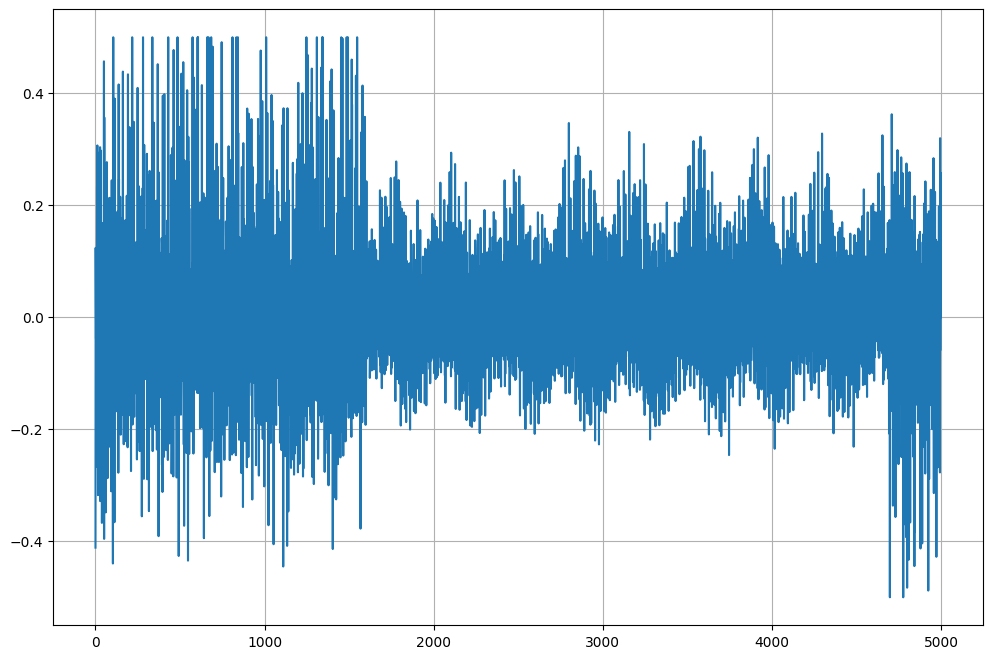

In [450]:
#UE Connected + iperf (1MBps) UL
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(power_trace)

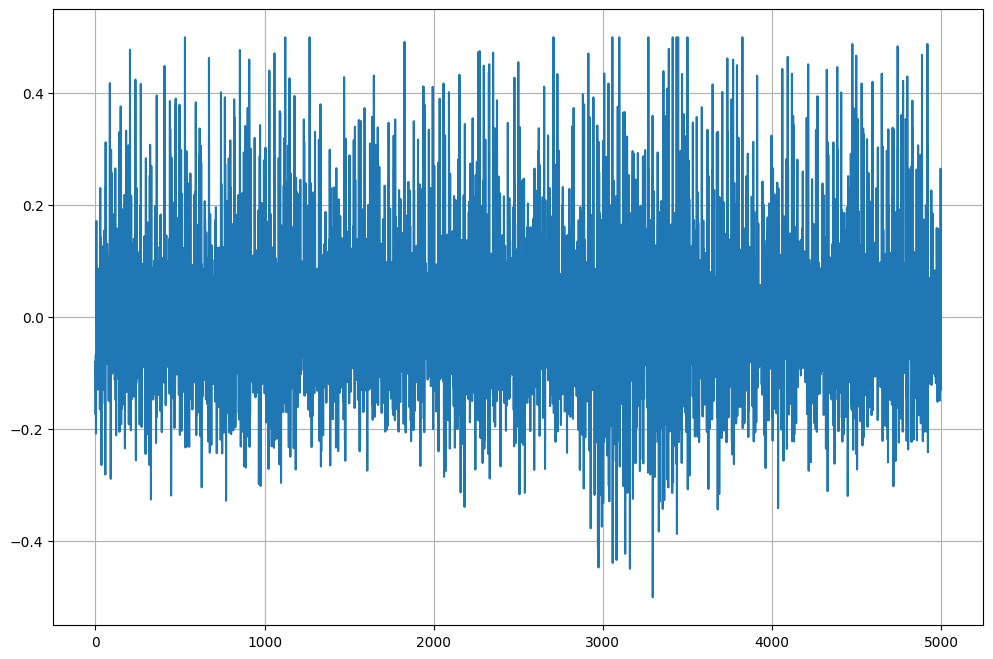

In [441]:
#UE Connected + iperf (10MBps) UL
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(power_trace)

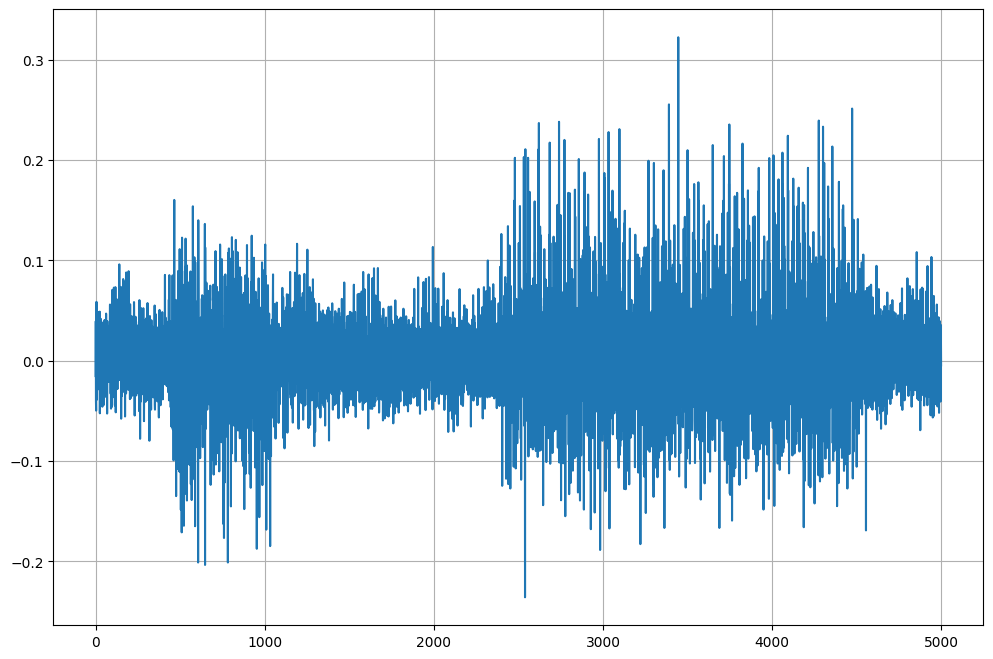

In [426]:
#UE Connected + iperf (1MBps) DL
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(power_trace)

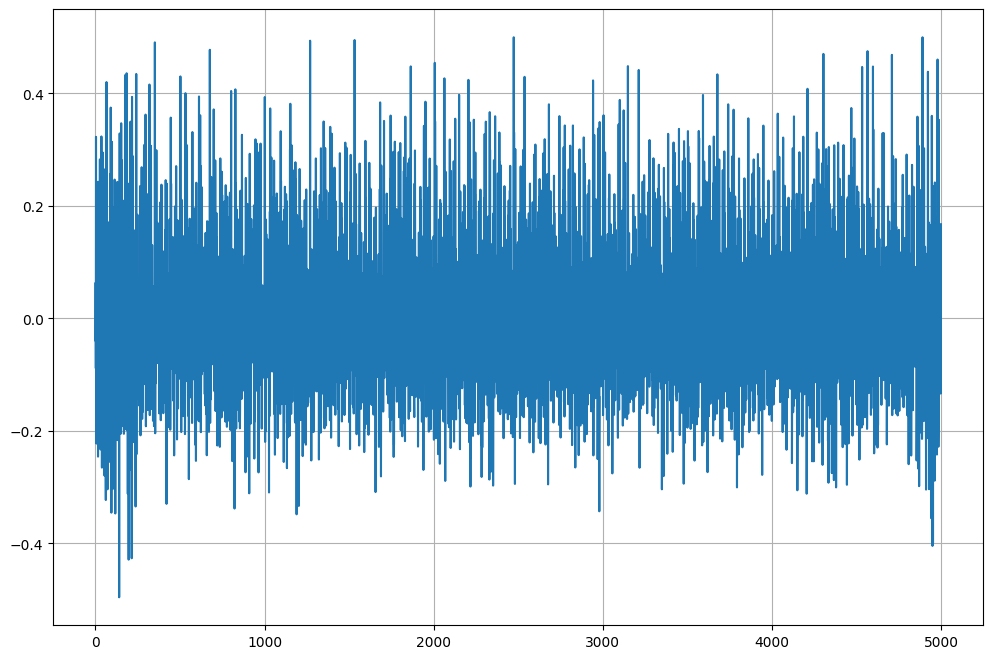

In [417]:
#UE Connected + iperf (10MBps) DL
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(power_trace)

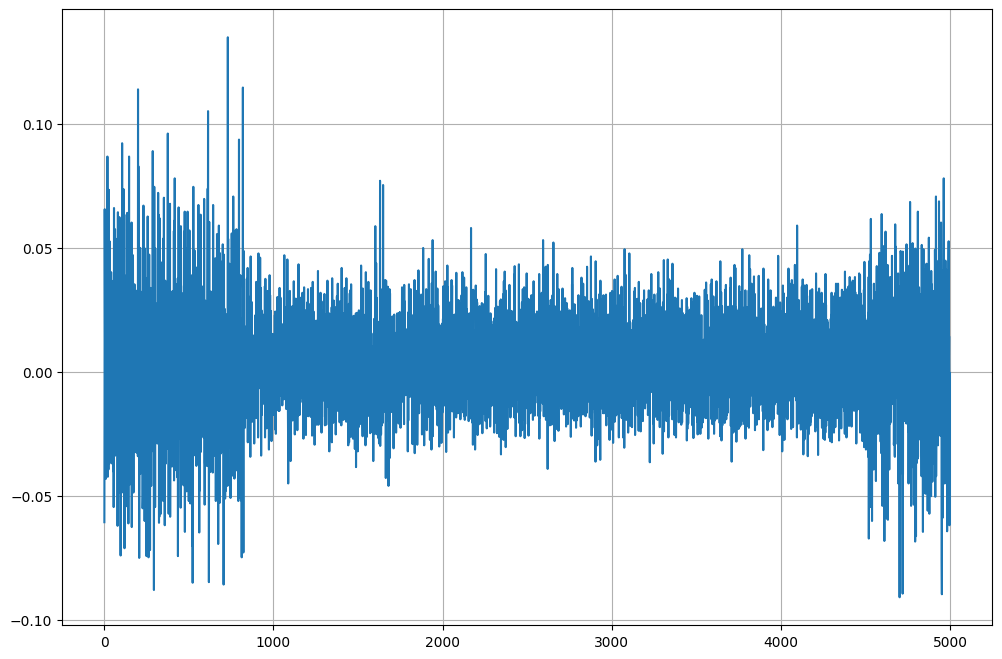

In [357]:
#NO UE Connected
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(power_trace)

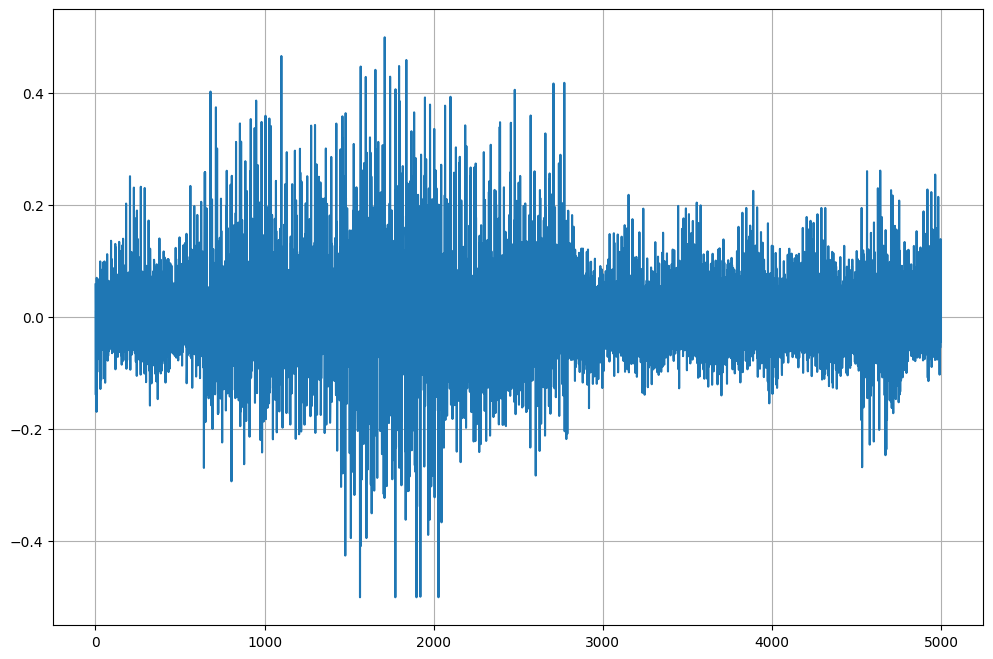

In [381]:
#UE Connected 
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(power_trace)

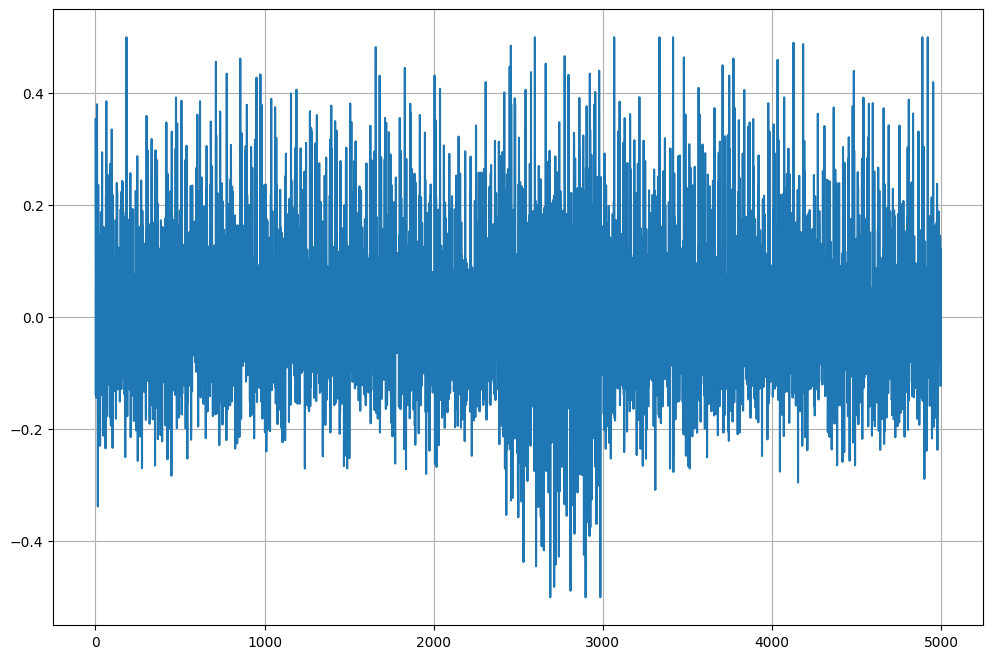

In [390]:
#UE Connected + iperf
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(power_trace)

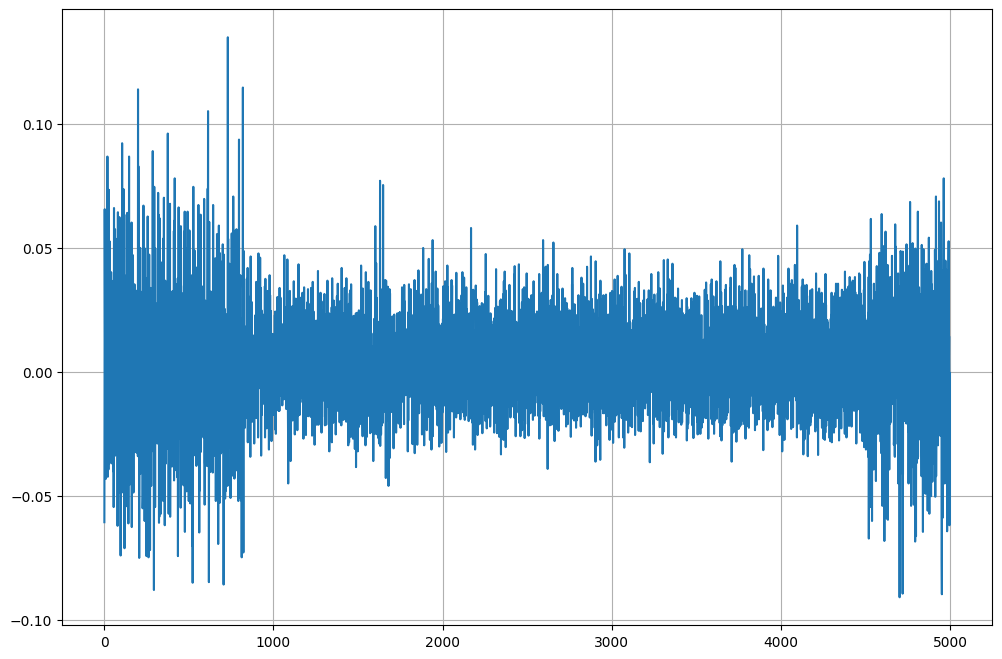

In [357]:
#NO UE Connected
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(power_trace)

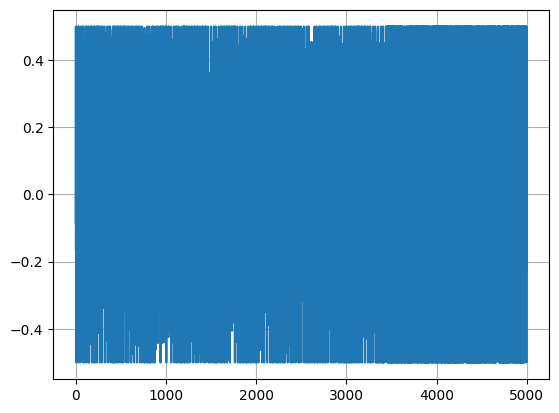

In [204]:
#UE Connected + No data transmission
plt.grid()
plt.plot(power_trace)

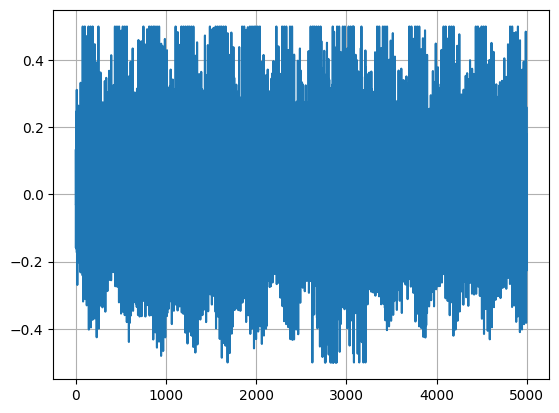

In [207]:
#UE Connected + Ping (downlink)
plt.grid()
plt.plot(power_trace)

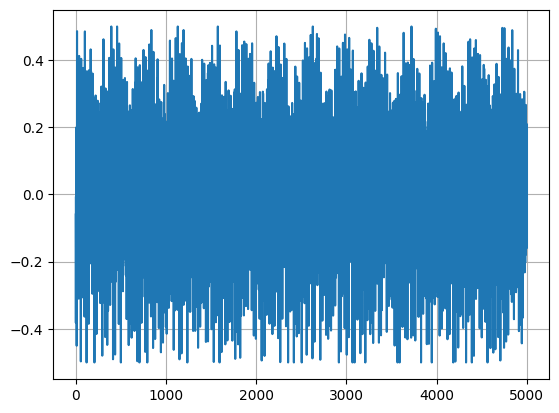

In [219]:
#UE Connected + iperf (downlink) + 5MHz
plt.grid()
plt.plot(power_trace)

In [60]:
import numpy as np
import time
import os

def collect_traces():
    # scope.adc.offset = 3
    scope.arm()
    print("Chipwhisperer armed")

    # target.simpleserial_write('p', msg)
    # print("Chipwhisperer triggered")

    scope.capture()
    print("Capture done!")

    power_trace = scope.get_last_trace()
    print(power_trace)

    return power_trace

trace_list = []
filename = '3x3_trail15.npy'

try:
    while True:
        wave = collect_traces()
        trace_list.append(wave)

        print(f"Captured trace {len(trace_list)}")

        time.sleep(4)

except KeyboardInterrupt:
    print("Stopped capturing traces. Saving the data...")

    # Convert trace_list to numpy array
    trace_array = np.array(trace_list)

    # Check if the file exists
    if os.path.exists(filename):
        # Load the existing data
        existing_data = np.load(filename, allow_pickle=True)
        # Concatenate new traces with existing data
        all_traces = np.concatenate((existing_data, trace_array))
    else:
        # If no existing file, just use the current batch
        all_traces = trace_array

    # Save the concatenated data
    np.save(filename, all_traces)

    print(f"Captured {len(trace_list)} traces. Data saved to '{filename}'.")

Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
[ 0.00952148 -0.00048828 -0.02661133 ... -0.00048828 -0.00292969
 -0.00097656]
Captured trace 1
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
[ 0.00195312 -0.01660156  0.00561523 ... -0.00073242  0.03808594
 -0.01782227]
Captured trace 2
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
[-0.01025391  0.00854492  0.00830078 ...  0.03710938  0.00415039
  0.01416016]
Captured trace 3
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
[-0.02148438  0.00048828  0.02709961 ... -0.00561523  0.02172852
 -0.05151367]
Captured trace 4
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
[-0.01513672  0.02075195  0.00048828 ...  0.00634766 -0.00097656
 -0.01245117]
Captured trace 5
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
[ 0.015625    0.         -0.01635742 ...  0.0078125  -0.03930664
  0.01196289]
Captured trace 6
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
[-0.00341797 -0.02392578  0.01538086 ...  0.00976562  0.01245117
  0.0078125 ]
Captured trace 7
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
[ 0.00585938  0.00732422 -0.00292969 ...  0.00219727  0.00561523
  0.        ]
Captured trace 8
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
[ 0.01318359  0.00708008  0.02587891 ... -0.01855469 -0.00537109
  0.00585938]
Captured trace 9
Stopped capturing traces. Saving the data...
Captured 9 traces. Data saved to '3x3_trail15.npy'.


In [48]:
import csv

trace_array = np.load('capture_pwr_traces_iperf_high.npy')

with open ('capture_pwr_traces_iperf_high.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for trace in trace_array:
        writer.writerow(trace)
print('Trace data saved to captured_EM_traces_high.csv')


3x3_trail7.csv


In [ ]:
scope.errors

In [55]:
len(filename)

15

In [307]:
power_trace = scope.get_last_trace()
print(power_trace)

[ 0.00415039  0.01171875 -0.00268555 ...  0.00512695  0.00585938
  0.00830078]


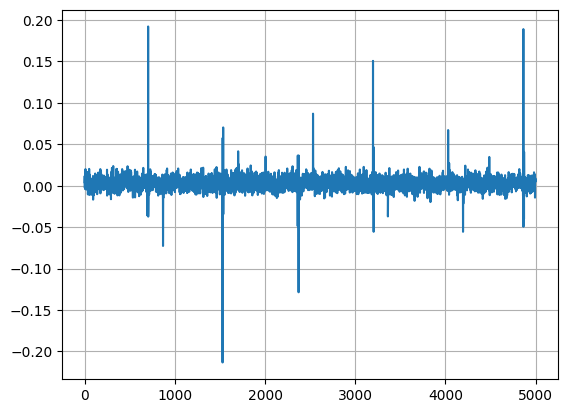

In [308]:

plt.grid()
plt.plot(power_trace)

In [46]:
import numpy as np

# Load the array from the .npy file
array = np.load('3x3_trail7.npy')

# Assuming 'trace' means rows and you want to delete the last 3 rows
# Remove the last 3 rows
updated_array = array[:-3, :]

# Save the updated array back to a new file (optional)
np.save('3x3_trail7_updated.npy', updated_array)


In [47]:
len(filename)

14

In [ ]:
#Data Collect Code

In [37]:
import serial
import time
import numpy as np
import os

# Printer Configuration
SERIAL_PORT = '/dev/ttyUSB0'  # Replace with your serial port
BAUD_RATE = 115200  # Typical baud rate for Ender 3
TIMEOUT = 1  # Timeout for printer communication

######### File Configuration ###########
FILENAME = 'Default_Conf_iperf_5M_256.npy'
########################################

# Complete G-code sequence
GCODE_INIT = [
    "G21",  # Set units to millimeters
    "G90",  # Absolute positioning
    "M140 S0",  # Disable bed heating
    "M104 S0",  # Disable extruder heating
    "M107",  # Fan off
    "G28",  # Home all axes
    "G0 Z25.4 F3000",  # Raise Z-axis 1 inch
    "G0 X22.7 Y116.8 F3000",  # Move to the top-left corner of the grid
    "G0 Z0.0 F3000"  # Lower Z-axis to starting position
]

GCODE_FINAL = [
    "G0 Z25.4 F3000",  # Raise Z-axis 1 inch after finishing the grid
    "M140 S0",  # Turn off bed heating
    "M104 S0",  # Turn off extruder heating
    "M84"  # Disable motors
]

# ChipWhisperer Data Collection
def collect_traces():
    """Collect power traces using ChipWhisperer."""
    scope.arm()
    print("Chipwhisperer armed")

    scope.capture()
    print("Capture done!")

    power_trace = scope.get_last_trace()
    print(f"Power trace captured: {power_trace}")

    return power_trace

def send_gcode_to_printer(ser, gcode_command):
    """Send a G-code command to the printer."""
    ser.write((gcode_command + '\n').encode())
    print(f"Sent: {gcode_command}")

def main():
    """Main routine to control the printer and collect traces."""
    trace_list = []
    TARGET_POSITION = "G1 X32.86 Y116.8 Z0.0 F1500"  # Replace with your desired G-code position
    TRACE_COUNT = 50  # Number of traces to collect

    with serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=TIMEOUT) as ser:
        print("Printer connected. Sending initialization G-code.")

        # Send initialization G-code
        for command in GCODE_INIT:
            send_gcode_to_printer(ser, command)
            time.sleep(6)  # Maintain a 6-second delay for initialization

        # Move to the target position
        print(f"Moving to target position: {TARGET_POSITION}")
        send_gcode_to_printer(ser, TARGET_POSITION)
        time.sleep(2)  # Wait for movement to complete

        # Collect 25 traces at the target position
        print(f"Collecting {TRACE_COUNT} traces at the target position.")
        for idx in range(TRACE_COUNT):
            # Arm and capture trace
            trace = collect_traces()
            trace_list.append(trace)
            print(f"Captured trace {idx + 1}/{TRACE_COUNT}")

            # Optional: Wait time between traces
            time.sleep(2)

        # Send final G-code
        print("Sending final G-code.")
        for command in GCODE_FINAL:
            send_gcode_to_printer(ser, command)
            time.sleep(1)  # Maintain a 6-second delay for finalization

    # Save all collected traces to file
    trace_array = np.array(trace_list)
    if os.path.exists(FILENAME):
        existing_data = np.load(FILENAME, allow_pickle=True)
        all_traces = np.concatenate((existing_data, trace_array))
    else:
        all_traces = trace_array
    np.save(FILENAME, all_traces)
    print(f"Traces saved to {FILENAME}. Total traces collected: {len(trace_list)}.")

if __name__ == "__main__":
    main()


Printer connected. Sending initialization G-code.
Sent: G21
Sent: G90
Sent: M140 S0
Sent: M104 S0
Sent: M107
Sent: G28
Sent: G0 Z25.4 F3000
Sent: G0 X22.7 Y116.8 F3000
Sent: G0 Z0.0 F3000
Moving to target position: G1 X32.86 Y116.8 Z0.0 F1500
Sent: G1 X32.86 Y116.8 Z0.0 F1500
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.02416992 -0.03198242 -0.01635742 ...  0.00830078  0.02124023
  0.0078125 ]
Captured trace 1/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.02148438  0.02148438  0.01928711 ... -0.03271484 -0.0324707
 -0.02856445]
Captured trace 2/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.00317383 -0.00195312  0.00463867 ...  0.01049805  0.00317383
  0.00415039]
Captured trace 3/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.         -0.00073242 -0.00463867 ... -0.0090332   0.00195312
 -0.00878906]
Captured trace 4/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.02148438 -0.01953125 -0.01220703 ...  0.00195312  0.0078125
  0.00488281]
Captured trace 5/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [0.00244141 0.00805664 0.00512695 ... 0.02392578 0.03540039 0.03564453]
Captured trace 6/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.0144043  -0.02124023 -0.02099609 ...  0.01171875  0.00512695
  0.00683594]
Captured trace 7/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.00415039 -0.00195312  0.0012207  ...  0.02319336  0.01879883
  0.02026367]
Captured trace 8/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.00708008 -0.02172852 -0.01391602 ...  0.00317383  0.01123047
  0.01269531]
Captured trace 9/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [0.00537109 0.00488281 0.00073242 ... 0.00927734 0.01269531 0.01074219]
Captured trace 10/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.01708984  0.02709961  0.01464844 ... -0.02416992 -0.02124023
 -0.03369141]
Captured trace 11/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.01098633  0.00732422  0.01367188 ... -0.01757812 -0.0065918
 -0.01660156]
Captured trace 12/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.02124023  0.02856445  0.03271484 ... -0.01660156 -0.00537109
 -0.02075195]
Captured trace 13/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.01293945  0.00390625  0.00537109 ...  0.01220703 -0.00952148
 -0.00244141]
Captured trace 14/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.00073242  0.01098633  0.0144043  ...  0.00756836  0.01196289
  0.        ]
Captured trace 15/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.01049805 -0.00292969  0.01318359 ...  0.02441406  0.04223633
  0.01831055]
Captured trace 16/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.00878906  0.01806641  0.01904297 ... -0.01928711 -0.01782227
 -0.03173828]
Captured trace 17/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.02734375  0.03222656  0.03369141 ... -0.01831055 -0.01464844
 -0.01855469]
Captured trace 18/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.0012207  -0.01660156 -0.00390625 ...  0.00048828 -0.00463867
  0.00463867]
Captured trace 19/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.00146484 -0.00439453  0.00683594 ... -0.0012207   0.0090332
  0.00317383]
Captured trace 20/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [0.00268555 0.00268555 0.01367188 ... 0.02832031 0.0234375  0.02124023]
Captured trace 21/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [0.01806641 0.01220703 0.01953125 ... 0.02807617 0.02319336 0.02929688]
Captured trace 22/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.00024414 -0.00415039  0.00610352 ... -0.01391602  0.00048828
 -0.01611328]
Captured trace 23/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.0090332   0.01513672  0.01245117 ... -0.00415039  0.00048828
  0.00878906]
Captured trace 24/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.02270508 -0.0234375  -0.02294922 ...  0.01953125  0.00878906
  0.02124023]
Captured trace 25/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.00439453  0.00561523 -0.00390625 ... -0.0012207   0.01367188
  0.01074219]
Captured trace 26/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.01733398  0.00708008  0.00146484 ... -0.00219727 -0.00097656
  0.00244141]
Captured trace 27/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.01489258 -0.0090332   0.01147461 ...  0.00463867  0.00683594
  0.01977539]
Captured trace 28/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.0378418   0.02148438  0.02734375 ... -0.02050781 -0.0246582
 -0.03295898]
Captured trace 29/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.02587891 -0.02832031 -0.02490234 ...  0.0078125   0.01123047
  0.01123047]
Captured trace 30/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.01416016 -0.00610352 -0.01074219 ...  0.01098633  0.0090332
  0.01025391]
Captured trace 31/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.02294922  0.00390625  0.00878906 ... -0.04003906 -0.02246094
 -0.02807617]
Captured trace 32/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.02172852 -0.02392578 -0.01904297 ...  0.00854492  0.00732422
  0.01318359]
Captured trace 33/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.00244141 -0.00878906  0.00244141 ...  0.02246094  0.03417969
  0.02685547]
Captured trace 34/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.01635742  0.02758789  0.02978516 ... -0.01489258 -0.03100586
 -0.02832031]
Captured trace 35/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.01953125  0.02124023  0.01342773 ... -0.0222168  -0.0144043
 -0.0222168 ]
Captured trace 36/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.00610352  0.01000977  0.01025391 ... -0.02490234 -0.00537109
 -0.02026367]
Captured trace 37/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.00390625  0.00415039  0.00683594 ...  0.01049805  0.0234375
  0.00488281]
Captured trace 38/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.00366211 -0.00244141 -0.00073242 ...  0.01318359  0.00976562
  0.00561523]
Captured trace 39/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.02075195  0.03173828  0.03125    ... -0.01953125 -0.02783203
 -0.01513672]
Captured trace 40/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.01000977  0.00927734 -0.00195312 ...  0.0012207   0.00097656
  0.00927734]
Captured trace 41/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.01953125  0.03100586  0.02514648 ... -0.02758789 -0.01660156
 -0.02758789]
Captured trace 42/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.00317383  0.00585938  0.00439453 ...  0.00292969  0.0144043
  0.02001953]
Captured trace 43/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.01049805  0.00708008  0.00732422 ...  0.02050781  0.03100586
  0.02539062]
Captured trace 44/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.00610352  0.00439453  0.01074219 ...  0.02880859  0.02807617
  0.02978516]
Captured trace 45/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.02319336 -0.01708984 -0.03295898 ...  0.015625    0.01074219
  0.00976562]
Captured trace 46/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [0.01074219 0.01538086 0.00146484 ... 0.01757812 0.01147461 0.01708984]
Captured trace 47/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.03198242 -0.03100586 -0.03613281 ...  0.01123047 -0.00244141
  0.00952148]
Captured trace 48/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.03710938  0.02954102  0.02001953 ... -0.02587891 -0.03442383
 -0.03271484]
Captured trace 49/50
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.00048828  0.00244141  0.01245117 ... -0.01464844 -0.00976562
 -0.0144043 ]
Captured trace 50/50
Sending final G-code.
Sent: G0 Z25.4 F3000
Sent: M140 S0
Sent: M104 S0
Sent: M84
Traces saved to Default_Conf_iperf_5M_256.npy. Total traces collected: 50.


In [ ]:
#3X3 Position Trial Code

In [30]:
import serial
import time
import numpy as np
import os

# Printer Configuration
SERIAL_PORT = '/dev/ttyUSB0'  # Replace with your serial port
BAUD_RATE = 115200  # Typical baud rate for Ender 3
TIMEOUT = 1  # Timeout for printer communication

######### File Configuration ###########
FILENAME = 'trail7.npy'
########################################

# Complete G-code sequence
GCODE_INIT = [
    "G21",  # Set units to millimeters
    "G90",  # Absolute positioning
    "M140 S0",  # Disable bed heating
    "M104 S0",  # Disable extruder heating
    "M107",  # Fan off
    "G28",  # Home all axes
    "G0 Z25.4 F3000",  # Raise Z-axis 1 inch
    "G0 X22.7 Y116.8 F3000",  # Move to the top-left corner of the grid
    "G0 Z0.0 F3000"  # Lower Z-axis to starting position
]

GCODE_POSITIONS = [
    "G1 X22.7 Y116.8 Z0.0 F1500",  # Point 1
    "G1 X27.78 Y116.8 Z0.0 F1500",  # Point 2
    "G1 X32.86 Y116.8 Z0.0 F1500",  # Point 3
    "G1 X32.86 Y121.88 Z0.0 F1500",  # Point 6
    "G1 X27.78 Y121.88 Z0.0 F1500",  # Point 5
    "G1 X22.7 Y121.88 Z0.0 F1500",  # Point 4
    "G1 X22.7 Y126.96 Z0.0 F1500",  # Point 7
    "G1 X27.78 Y126.96 Z0.0 F1500",  # Point 8
    "G1 X32.86 Y126.96 Z0.0 F1500"   # Point 9
]

GCODE_FINAL = [
    "G0 Z25.4 F3000",  # Raise Z-axis 1 inch after finishing the grid
    "M140 S0",  # Turn off bed heating
    "M104 S0",  # Turn off extruder heating
    "M84"  # Disable motors
]

# ChipWhisperer Data Collection
def collect_traces():
    """Collect power traces using ChipWhisperer."""
    scope.arm()
    print("Chipwhisperer armed")

    scope.capture()
    print("Capture done!")

    power_trace = scope.get_last_trace()
    print(f"Power trace captured: {power_trace}")

    return power_trace

def send_gcode_to_printer(ser, gcode_command):
    """Send a G-code command to the printer."""
    ser.write((gcode_command + '\n').encode())
    print(f"Sent: {gcode_command}")

def main():
    """Main routine to control the printer and collect traces."""
    trace_list = []

    with serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=TIMEOUT) as ser:
        print("Printer connected. Sending initialization G-code.")

        # Send initialization G-code
        for command in GCODE_INIT:
            send_gcode_to_printer(ser, command)
            time.sleep(6)  # Maintain a 6-second delay for initialization

        # Move through grid positions and collect traces
        print("Starting grid movements and trace collection.")
        for idx, position in enumerate(GCODE_POSITIONS, start=1):
            # Move to the position
            send_gcode_to_printer(ser, position)
            time.sleep(2)  # Wait 2 seconds after movement

            # Arm and capture trace
            trace = collect_traces()
            trace_list.append(trace)
            print(f"Captured trace {idx}/{len(GCODE_POSITIONS)}")

            # Wait 2 seconds after capture
            time.sleep(2)

        # Send final G-code
        print("Sending final G-code.")
        for command in GCODE_FINAL:
            send_gcode_to_printer(ser, command)
            time.sleep(1)  # Maintain a 6-second delay for finalization

    # Save all collected traces to file
    trace_array = np.array(trace_list)
    if os.path.exists(FILENAME):
        existing_data = np.load(FILENAME, allow_pickle=True)
        all_traces = np.concatenate((existing_data, trace_array))
    else:
        all_traces = trace_array
    np.save(FILENAME, all_traces)
    print(f"Traces saved to {FILENAME}. Total traces: {len(trace_list)}.")

if __name__ == "__main__":
    main()


Printer connected. Sending initialization G-code.
Sent: G21
Sent: G90
Sent: M140 S0
Sent: M104 S0
Sent: M107
Sent: G28
Sent: G0 Z25.4 F3000
Sent: G0 X22.7 Y116.8 F3000
Sent: G0 Z0.0 F3000
Starting grid movements and trace collection.
Sent: G1 X22.7 Y116.8 Z0.0 F1500
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [0.01782227 0.00952148 0.00830078 ... 0.00952148 0.01757812 0.0246582 ]
Captured trace 1/9
Sent: G1 X27.78 Y116.8 Z0.0 F1500
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.00439453  0.0065918  -0.00146484 ... -0.0012207   0.01635742
  0.00366211]
Captured trace 2/9
Sent: G1 X32.86 Y116.8 Z0.0 F1500
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [-0.01098633 -0.01123047  0.00537109 ... -0.00219727 -0.00219727
  0.015625  ]
Captured trace 3/9
Sent: G1 X32.86 Y121.88 Z0.0 F1500
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.00048828  0.01416016 -0.00415039 ... -0.01757812 -0.01342773
 -0.01269531]
Captured trace 4/9
Sent: G1 X27.78 Y121.88 Z0.0 F1500
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.01733398  0.01611328  0.03051758 ... -0.00756836 -0.03173828
 -0.0090332 ]
Captured trace 5/9
Sent: G1 X22.7 Y121.88 Z0.0 F1500
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.00146484  0.00854492  0.00195312 ... -0.01733398 -0.01000977
 -0.0065918 ]
Captured trace 6/9
Sent: G1 X22.7 Y126.96 Z0.0 F1500
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.01953125  0.02001953  0.03198242 ... -0.01391602 -0.02490234
 -0.02294922]
Captured trace 7/9
Sent: G1 X27.78 Y126.96 Z0.0 F1500
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [ 0.03076172  0.02661133  0.02832031 ... -0.00537109 -0.015625
 -0.00927734]
Captured trace 8/9
Sent: G1 X32.86 Y126.96 Z0.0 F1500
Chipwhisperer armed


(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 13
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:732) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 12


Capture done!
Power trace captured: [0.02270508 0.00634766 0.00854492 ... 0.0222168  0.00732422 0.01806641]
Captured trace 9/9
Sending final G-code.
Sent: G0 Z25.4 F3000
Sent: M140 S0
Sent: M104 S0
Sent: M84
Traces saved to trail7.npy. Total traces: 9.
